In [2]:
from dstk.imputation import DefaultImputer
import os
import pandas as pd
import numpy as np
import re
import pickle
from scf_impute import analysis_variables
from scipy import stats
import matplotlib
import missingno as msno
%matplotlib inline

/Users/manu/anaconda3/envs/gdal2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
DATA_FOLDER = 'data'
dct_param = {'data': os.path.join('..', 'data'),
             'missing_val': 'nan'}

In [4]:
with open(os.path.join(DATA_FOLDER, 'variables.pickle'), 'rb') as handle:
        dct_data = pickle.load(handle)

In [5]:
df_raw_data = dct_data['df_raw_data']

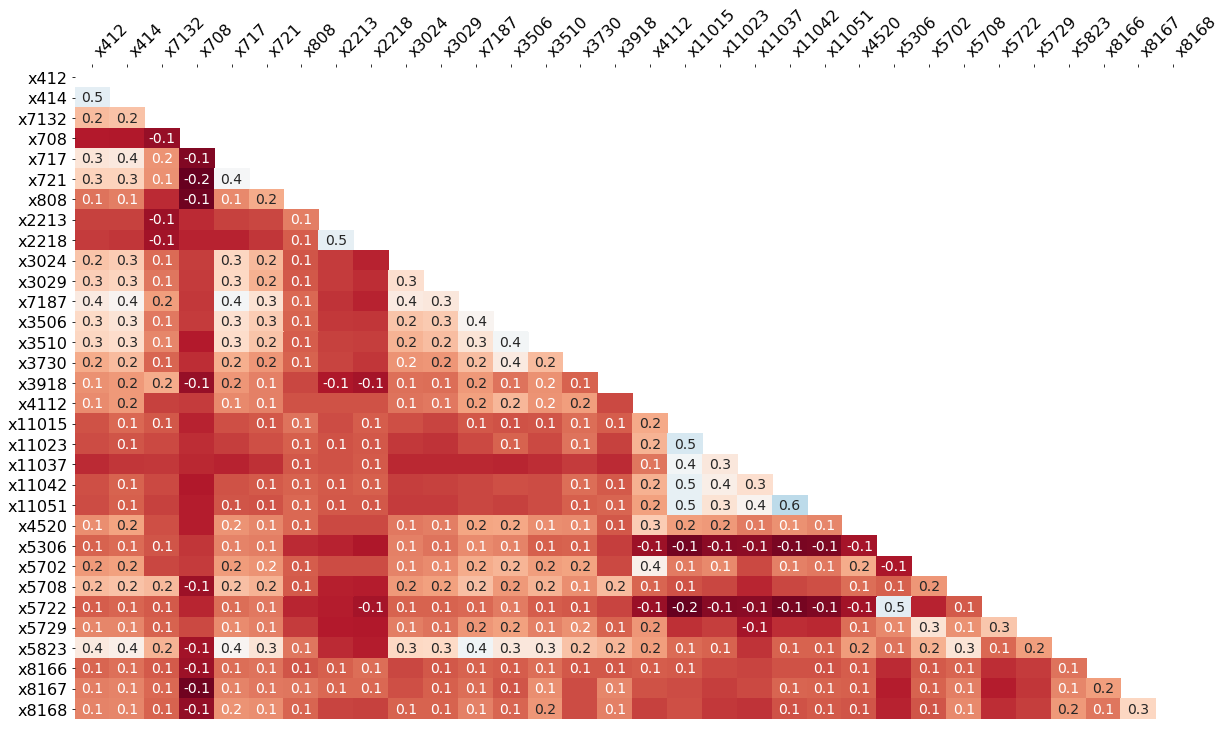

In [6]:
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', n=50, p=0.9)
msno.heatmap(filtered_data)

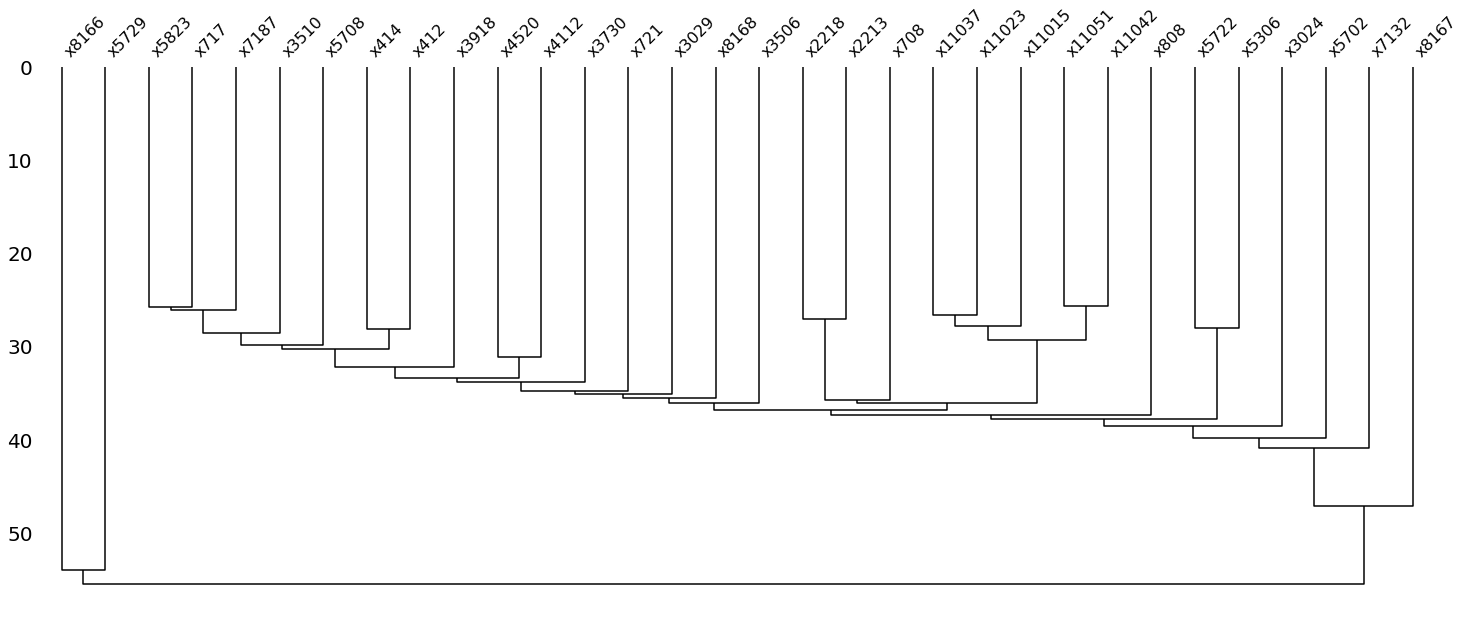

In [7]:
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', p=0.9)
msno.dendrogram(filtered_data)

# MSE Calculation

In [83]:
from sklearn.metrics import mean_squared_error, accuracy_score

def get_mse(df_full_data, df_imputed, lst_num_cols, df_removed):
    df_full_scaled, df_col_mu_std = scale(df_full_data, lst_num_cols)
    df_imputed_scaled = scale_imputed(df_imputed, df_col_mu_std, lst_num_cols)
    
    y = pd.DataFrame(columns=('imputed', 'actual', 'row', 'col'))
    
    for col in set(lst_num_cols).intersection(set(df_removed.columns)):
        y = y.append(pd.DataFrame({'imputed': df_imputed_scaled.loc[np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','), col].values,
                        'actual': df_full_scaled.loc[np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','), col].values,
                                    'row': np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','),
                                    'col': [col] * np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=',').size}))
        
    return y, mean_squared_error(y['actual'], y['imputed'])

def get_accuracy(df_full_data, df_imputed, lst_char_cols, df_removed):
    
    y = pd.DataFrame(columns=['col', 'accuracy'])
    for col in set(lst_char_cols).intersection(set(df_removed.columns)):
        actual = df_full_data.loc[np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','), col].values
        imputed = df_imputed.loc[np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','), col].values
        
        
        y = y.append(pd.DataFrame({'col': col,
                      'accuracy': accuracy_score(actual, imputed)}, index=[min(0, y.shape[0] - 1)]))
        
    return y, y['accuracy'].mean()
        

def scale(df_raw_data, lst_num_cols):
    df_col_mu_std = pd.DataFrame(columns=['mean', 'std'])
    for col in lst_num_cols:
        if col in df_raw_data.columns:
            mu = df_raw_data[col].mean(skipna=True)
            std = df_raw_data[col].std(skipna=True)
            df_col_mu_std = df_col_mu_std.append(pd.DataFrame({'mean': mu,
                                               'std': std},
                                              index=[col]))
            df_raw_data[col] = (df_raw_data[col] - mu) / std

    return df_raw_data, df_col_mu_std

def scale_imputed(df_raw_data, df_col_mu_std, lst_num_cols):
    for col in lst_num_cols:
        if col in df_col_mu_std.index:
            mu = df_col_mu_std.loc[col, 'mean']
            std = df_col_mu_std.loc[col, 'std']
            df_raw_data[col] = (df_raw_data[col] - mu) / std
            
    return df_raw_data

In [72]:
lst_num_cols = dct_data['lst_num_cols']
lst_char_cols = dct_data['lst_char_cols']
df_removed = pd.read_csv(os.path.join('data', 'withheld_old.csv'))
df_full_data = pd.read_csv(os.path.join('data', 'full_cleaned_old.csv'), index_col=0)
df_imputed = pd.read_csv(os.path.join('data', 'knn_imputed_1.csv'), index_col=0)

In [73]:
y, mse = get_mse(df_full_data, df_imputed, lst_num_cols, df_removed)

In [84]:
y, m_accuracy = get_accuracy(df_full_data, df_imputed, lst_char_cols, df_removed)

In [85]:
m_accuracy

0.9011962823217804

In [86]:
y.to_csv('test.csv')

In [87]:
mse

1.1383797262849953

In [1]:
tot_rows = 1
dct_removed = {'r':1}

In [3]:
print("Finished withholding %s of %s rows" % (str(len(list(dct_removed.keys()))), str(tot_rows)))

Finished withholding 1 of 1 rows


In [29]:
import numpy as np
import pandas as pd
d = pd.DataFrame({'t': ['nan', 't', 'y']})

In [7]:
from sklearn.preprocessing import Imputer, LabelEncoder

In [30]:
encoder = LabelEncoder().fit(
                list(d['t']) + ['nan'])

In [33]:
r = pd.DataFrame()
r['t'] = encoder.transform(d['t'])

In [34]:
r['t']

0    0
1    1
2    2
Name: t, dtype: int64

In [38]:
missing_code = encoder.transform(['nan'])[0]
replacement = -1
n['t'] = r['t'].map(lambda x: replacement if x == missing_code else x)

In [39]:
n

0                                            -1
1                                             1
2                                             2
t    0   -1
1    1
2    2
Name: t, dtype: int64
Name: t, dtype: object

In [ ]:
missing_code = encoder.transform([self.missing_marker])[0]

In [41]:
col = n['t'].map(lambda x: missing_code if x ==
                               replacement else x)
y = encoder.inverse_transform(col)

/Users/manu/anaconda3/envs/gdal2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
col

0    0
1    1
2    2
Name: t, dtype: int64

In [42]:
y

array(['nan', 't', 'y'], dtype='<U3')

In [44]:
n['t'] == -1

0     True
1    False
2    False
Name: t, dtype: bool

In [45]:
t = np.array(['nan', 't', '5'])
t[[0, 5,3,6]]

IndexError: index 5 is out of bounds for axis 1 with size 3

In [46]:
t[t!='nan']

array(['t', '5'], dtype='<U3')